---
title: Quantum Modular Arithmetic in Qualtran
author: [Noureldin Yosri](https://github.com/NoureldinYosri)
date: today
...

# Introduction

Modular arithmetic is the backbone of number theortic and cryptographic algorithms such as factoring and elliptic curve cryptography. Qualtran provides a library of the state of the art constructions for peforming these operations on a fault tolerant quantum computer.

This notebook shows the different operations, their constructions and computational costs. The following table lists the different operations, their costs and source of the construction.

| operation                      | Bloq                                                                               | Qualtran Toffoli Cost     | Toffoli Cost From [Figure 8](https://arxiv.org/abs/2306.08585)   | references                                                                                                                                                                                                                                                                                                                                                                                                                  |
|:-------------------------------|:-----------------------------------------------------------------------------------|:--------------------------|:-----------------------------------------------------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| modular addition               | `qualtran.bloqs.mod_arithmetic.mod_addition.ModAdd`                                | $4 n - 1$                 | $4 n$                                                            | [How to compute a 256-bit elliptic curve private key with only 50 million Toffoli gates](https://arxiv.org/abs/2306.08585)                                                                                                                                                                                                                                                                                                  |
| modular controlled addition    | `qualtran.bloqs.mod_arithmetic.mod_addition.CModAdd`                               | $5 n + 1$                 | $5 n$                                                            | [How to compute a 256-bit elliptic curve private key with only 50 million Toffoli gates](https://arxiv.org/abs/2306.08585)                                                                                                                                                                                                                                                                                                  |
| modular negation               | `qualtran.bloqs.mod_arithmetic.mod_subtraction.ModNeg`                             | $3 n - 3$                 | $2 n$                                                            | [How to compute a 256-bit elliptic curve private key with only 50 million Toffoli gates](https://arxiv.org/abs/2306.08585)                                                                                                                                                                                                                                                                                                  |
| modular controlled negation    | `qualtran.bloqs.mod_arithmetic.mod_subtraction.CModNeg`                            | $3 n - 2$                 | $3 n$                                                            | [How to compute a 256-bit elliptic curve private key with only 50 million Toffoli gates](https://arxiv.org/abs/2306.08585)                                                                                                                                                                                                                                                                                                  |
| modular subtraction            | `qualtran.bloqs.mod_arithmetic.mod_subtraction.ModSub`                             | $6 n - 3$                 | $6 n$                                                            | [How to compute a 256-bit elliptic curve private key with only 50 million Toffoli gates](https://arxiv.org/abs/2306.08585)                                                                                                                                                                                                                                                                                                  |
| modular controlled subtraction | `qualtran.bloqs.mod_arithmetic.mod_subtraction.CModSub`                            | $7 n - 1$                 | $7 n$                                                            | [How to compute a 256-bit elliptic curve private key with only 50 million Toffoli gates](https://arxiv.org/abs/2306.08585)                                                                                                                                                                                                                                                                                                  |
| modular doubling               | `qualtran.bloqs.mod_arithmetic.mod_multiplication.ModDbl`                          | $2 n + 1$                 | $2 n$                                                            | [How to compute a 256-bit elliptic curve private key with only 50 million Toffoli gates](https://arxiv.org/abs/2306.08585)                                                                                                                                                                                                                                                                                                  |
| modular multiplication         | `qualtran.bloqs.mod_arithmetic.mod_multiplication.DirtyOutOfPlaceMontgomeryModMul` | $2.25 n^{2} +$$ 7.25 n - 1$ | $2.25 n^{2} + 9 n$                                               | - [Performance Analysis of a Repetition Cat Code Architecture: Computing 256-bit Elliptic Curve Logarithm in 9 Hours with 126 133 Cat Qubits](https://arxiv.org/abs/2302.06639)</br>- [How to compute a 256-bit elliptic curve private key with only 50 million Toffoli gates](https://arxiv.org/abs/2306.08585)                                                                                                            |
| modular multiplicative inverse | `qualtran.bloqs.mod_arithmetic.mod_division.KaliskiModInverse`                     | $26 n^{2} + 9 n - 1$      | $26 n^{2} + 2 n$                                                 | - [Performance Analysis of a Repetition Cat Code Architecture: Computing 256-bit Elliptic Curve Logarithm in 9 Hours with 126 133 Cat Qubits](https://arxiv.org/abs/2302.06639)</br>- [Improved quantum circuits for elliptic curve discrete logarithms](https://arxiv.org/abs/2001.09580)</br>- [How to compute a 256-bit elliptic curve private key with only 50 million Toffoli gates](https://arxiv.org/abs/2306.08585) |




If you compare qualtran's costs with the costs from Figure 8 of [How to compute a 256-bit elliptic curve private key with only 50 million Toffoli gates](https://arxiv.org/abs/2306.08585) you will find that generally we match the coefficient of the leading term while having smaller coefficients for the lower terms and we also list the constants. The two exception to this are modular negation where we have a higher leading coefficient ($3$ vs $2$) and modular inversion where we match the leading coefficient but have a higher coefficient for the lower term ($9$ vs $2$).

### Modular Negatition
The strucutre of the construction of this operation consists of two operations that cost $n$ toffolis between two n-bit toffolis resulting in $3n$ toffolis. The authors of [How to compute a 256-bit elliptic curve private key with only 50 million Toffoli gates](https://arxiv.org/abs/2306.08585) suggests using measurement based uncomputation (see. [Halving the cost of quantum addition](https://quantum-journal.org/papers/q-2018-06-18-74/#)) to turn the last n-bit toffoli into measurements + cliffords thus reducing the cost to $2n$. However, measurement based uncomputation doesn't strictly apply here since the control register is modified between the initial `And` computation and its adjoint/uncomputation, this leads to a mismatch between the value in the register and the value in the hidden ancillas with the overall effect being the introduction of random phase flips. That is the final state will have some coefficients multiplied by $-1$ randomly. We chose not to introduce this effect into our construction.


### Modular Inversion
Our cost for this operation $26n^2+9n-1$ which differs from their cost of $26n^2+2n$ by $7n-1$. The reason of this, is the constants that they omitted for the other operations. This operation consists of a loop that repeats the same circuit $2n$ times, thus the constants of that inner circuit contribute to the coefficient of $n$ since they get multiplied by $2n$. This bloq shows Qualtran's ability to compute accurate resource estimates.

## Assumptions
1. Certain operations (e.g. modular doubling) assume the modulus is odd. This is because most applications (e.g. factoring) have this assumption and because the construction becomes simpler.
1.  All operations assume their inputs are valid. For example modular inversion assumes that all the input states have an inverse and modular multiplication assumes that its inputs are $\in [1, \mod)$ that is they exclude $0$.
1. In literature modular operations are assumed to become identity when they apply to states outside their valid range. For example, the circuit applying modular negation modulu $m$ with $n$ bits is defined as
$$
\mathbb{O} \ket{x} →
\begin{cases}
\ket{- x \mod m} & 0 \leq x < m \\
\ket{x} & p < x < 2^n
\end{cases}
$$
This is done to ensure that the circuit is unitary. However, constructions always assume that their inputs are valid as explained above.



## Correctness checks for constructions
Qualtran provides a suite of tools to check the correctness of bloq construction/decomposition. Out of them, we highlight the classical simulation check. This check is very important to arithmetic bloqs since it ensure that if the input is a single classical state then final state is the expected single classical state with one of the limitations of this test being that it can't detect problems with phases.

Even with this limitation the classical simulation check was able to detect problems with constructions from the literature. For the example, the use of measurement based uncomputation to lower the cost of modular negation in [How to compute a 256-bit elliptic curve private key
with only 50 million Toffoli gates](https://arxiv.org/pdf/2306.08585) where it is not applicable.

A second test is checking the matrix of the construction which we calculate using tensor network contraction. Since all modular arithmetic function are reversible functions, their matrices are permutation matrices. More preciesly the submatrix for the valid input range (e.g. $[0, \mod) × [0, \mod)$ for modular negation) should be a permutation matrix.

In [25]:
import qualtran
import cirq
import sympy
import numpy as np

from qualtran import QMontgomeryUInt
from qualtran.drawing import show_bloq, show_call_graph
import qualtran.bloqs.mod_arithmetic as qma
from qualtran.resource_counting import get_cost_value, QECGatesCost

### Addition
Quantum modular addition performs the transformation $\ket{x} \ket{y} → \ket{x} \ket{(x+y) \mod m}$

In qualtran the bloq that represents this operation is `ModAdd`. The circuit construction for this operation is a translation of the classical program:

```python
def add_mod(x, y, m):
    y += x  # normal in-place addition y := x + y.
    y -= m  # subtract constant y := x + y - m.
    c = y < 0  # c := (x + y - m < 0)
    if c:
      y += m  # y := x + y
    else:
      #  y := x + y - m  which is >= 0
    c ^= y > x  # Regardless of what happened in the condition above c := 1
    c ^= 1  # c := 0
    return x, y
```

Which means we will do:
1. one addition
1. two addition with a constant
1. one bit flip

Note that the check $y < 0$ is done by simply checking the overflow bit.

Which can be seen the call graph below

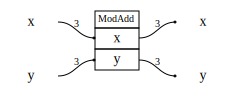

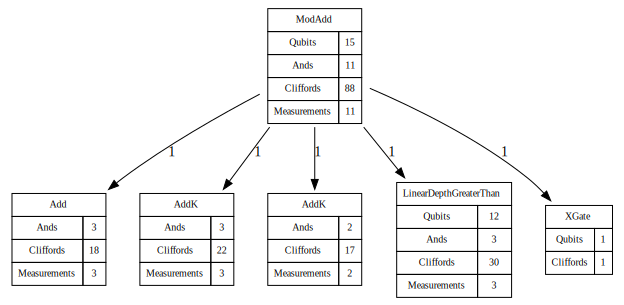

In [3]:
bitsize = 3
mod = 7

add = qma.ModAdd(bitsize, mod)
show_bloq(add)
show_call_graph(add, max_depth=1)

In [4]:
# To check the correctness we first do a classical simulation check
for x in range(mod):
    for y in range(mod):
        assert add.call_classically(x=x, y=y) == (x, (x + y) % mod)
print('passed classical check :D')

passed classical check :D


In [5]:
# Secondly we check that the construction/decomposition also passes the classical check.
add_decom = add.decompose_bloq()
for x in range(mod):
    for y in range(mod):
        assert add_decom.call_classically(x=x, y=y) == (x, (x + y) % mod)
print('passed classical check :D')

passed classical check :D


In [12]:
# Thirdly we check that the unitary doesn't add any phases.
matrix = add.tensor_contract()
eps = 1e-6
is_zero = np.abs(matrix) < eps
is_one = np.abs(matrix - 1) < eps
assert np.all(is_zero | is_one)  # all entries are ~0 or ~1
print('passed phase check :D')

passed phase check :D


In [18]:
# Finally we check the toffoli cost
# According to table 5 in https://arxiv.org/pdf/2306.08585 this toffoli cost should be 4n up to a constant.
symbolic_n, symbolic_mod = sympy.symbols('n m')
cost = get_cost_value(qma.ModAdd(symbolic_n, symbolic_mod), QECGatesCost()).total_toffoli_only()
print('toffoli cost:', cost)
const = cost.subs(symbolic_n, 0)
assert cost - const == 4 * symbolic_n
print('passed symbolic cost check :D')

toffoli cost: 4*n - 1
passed symbolic cost check :D


In [24]:
# To help with other operations we create a test suite


def check_no_phase_change(blq, eps=1e-6):
    matrix = blq.tensor_contract()
    is_zero = np.abs(matrix) < eps
    is_one = np.abs(matrix - 1) < eps
    assert np.all(is_zero | is_one)  # all entries are ~0 or ~1
    print('passed phase check :D')


def check_symbolic_cost(blq, formula):
    cost = get_cost_value(blq, QECGatesCost()).total_toffoli_only()
    print(f'toffoli cost of {blq}:', cost)
    print(f'expect: {formula}')
    const = cost.subs(symbolic_n, 0)
    assert cost - const == formula
    print('passed symbolic cost check :D')

## Controlled Modular Addition

It's often useful to have special constructions of the controlled version of an operation. That is because controlling every suboperation of the original construction -while being correct- is expensive since it turns every CNOT into a toffoli and every toffoli ladder of size $n$ to a toffoli ladder of size $n+1$.

For the case of controlled modular addition, it is enough to control the first addition and comparision.

```python
def controlled_add_mod(ctr, x, y, m):
    if ctrl:
      y += x  # normal in-place addition.
    y -= m  # subtract constant.
    c = y < 0
    if c:
      y += m
    if ctrl:
      c ^= y > x  # after this line `c = 1`
    c ^= 1
    return x, y
```

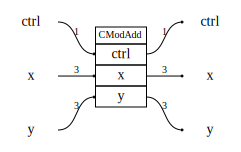

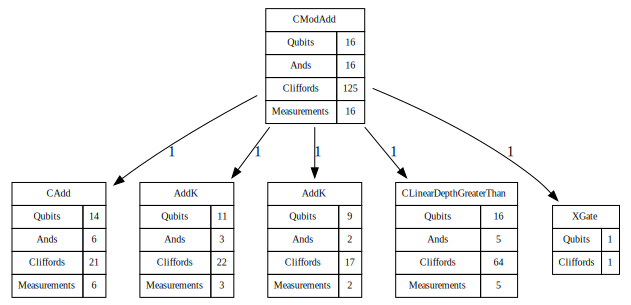

In [20]:
cadd = qma.CModAdd(qualtran.QMontgomeryUInt(bitsize), mod)
show_bloq(cadd)
show_call_graph(cadd, max_depth=1)

In [21]:
for ctrl in range(2):
    for x in range(mod):
        for y in range(mod):
            want = (x + y) % mod if ctrl else y
            assert cadd.call_classically(ctrl=ctrl, x=x, y=y) == (ctrl, x, want)
print('cadd passed classical check :D')
cadd_decom = cadd.decompose_bloq()
for ctrl in range(2):
    for x in range(mod):
        for y in range(mod):
            want = (x + y) % mod if ctrl else y
            assert cadd_decom.call_classically(ctrl=ctrl, x=x, y=y) == (ctrl, x, want)
print('construction of cadd passed classical check :D')

cadd passed classical check :D
construction of cadd passed classical check :D


In [23]:
check_no_phase_change(cadd)
check_symbolic_cost(qma.CModAdd(QMontgomeryUInt(symbolic_n), symbolic_mod), 5 * symbolic_n)

passed phase check :D
toffoli cost of CModAdd: 5*n + 1
expect 5*n
passed symbolic cost check :D
